In [1]:
import pandas as pd
df=pd.read_excel(r"C:\Users\Dell\Desktop\data set\bankruptcy-prevention.xlsx")

In [2]:
df.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   industrial_risk        250 non-null    float64
 1   management_risk        250 non-null    float64
 2   financial_flexibility  250 non-null    float64
 3   credibility            250 non-null    float64
 4   competitiveness        250 non-null    float64
 5   operating_risk         250 non-null    float64
 6   class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [4]:
df.shape

(250, 7)

In [5]:
df.isnull().sum()

industrial_risk          0
management_risk          0
financial_flexibility    0
credibility              0
competitiveness          0
operating_risk           0
class                    0
dtype: int64

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

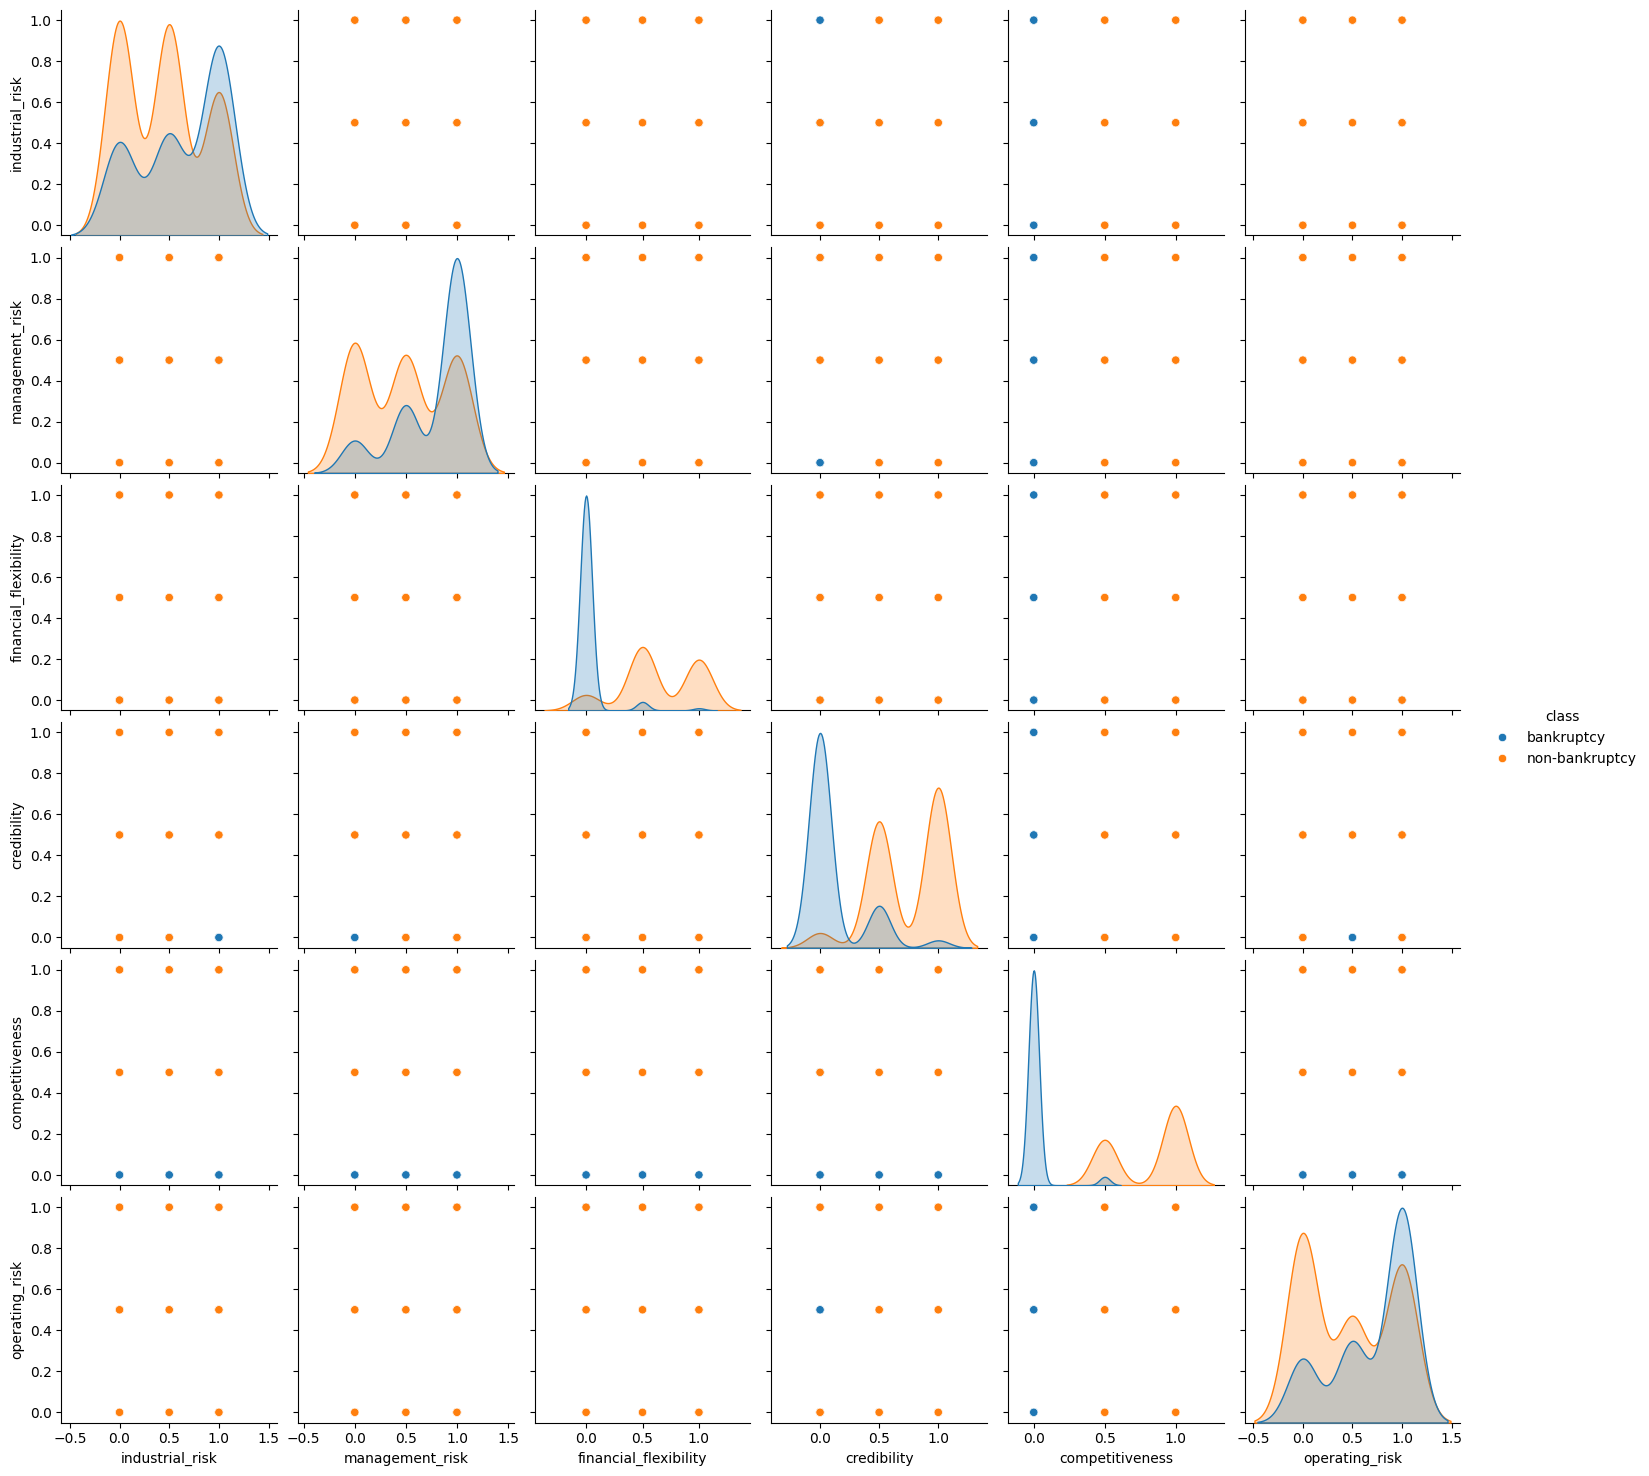

In [7]:
sns.pairplot(df,hue="class")
plt.show()

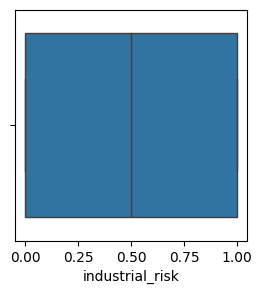

In [8]:
plt.figure(figsize=(3,3))
sns.boxplot(x="industrial_risk",data=df)
plt.show()

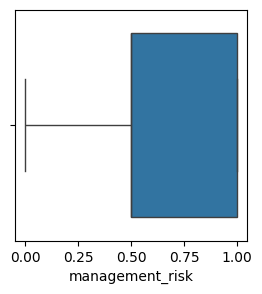

In [9]:
plt.figure(figsize=(3,3))
sns.boxplot(x="management_risk",data=df)
plt.show()

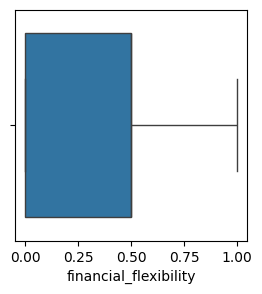

In [10]:
plt.figure(figsize=(3,3))
sns.boxplot(x="financial_flexibility",data=df)
plt.show()

In [11]:
df.columns

Index(['industrial_risk', 'management_risk', 'financial_flexibility',
       'credibility', 'competitiveness', 'operating_risk', 'class'],
      dtype='object')

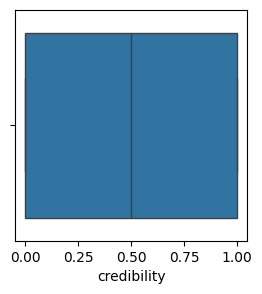

In [12]:
plt.figure(figsize=(3,3))
sns.boxplot(x="credibility",data=df)
plt.show()

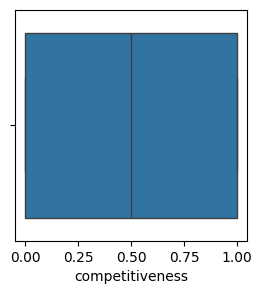

In [13]:
plt.figure(figsize=(3,3))
sns.boxplot(x="competitiveness",data=df)
plt.show()

In [14]:
df.columns

Index(['industrial_risk', 'management_risk', 'financial_flexibility',
       'credibility', 'competitiveness', 'operating_risk', 'class'],
      dtype='object')

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
df_en=df[['class']]

In [19]:
le=LabelEncoder()
le.fit(df_en)

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LabelEncoder()

In [21]:
df['class']=le.transform(df['class'])

In [22]:
df

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,1
246,1.0,1.0,0.5,1.0,1.0,0.0,1
247,0.0,1.0,1.0,0.5,0.5,0.0,1
248,1.0,0.0,0.5,1.0,0.5,0.0,1


In [25]:
x=df.drop(["class"],axis=1)
y=df["class"]

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [29]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((198, 6), (50, 6), (198,), (50,))

In [32]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [34]:
lr.score(x_test,y_test)*100

100.0

In [39]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Compute the confusion matrix
cf = confusion_matrix(y_test, lr.predict(x_test))

# Display the confusion matrix
print("Confusion Matrix:\n", cf)

# Compute precision, recall, and F1 score
precision = precision_score(y_test, lr.predict(x_test), average='binary')  # Use 'binary' for binary classification
recall = recall_score(y_test, lr.predict(x_test), average='binary')
f1 = f1_score(y_test, lr.predict(x_test), average='binary')

# Display scores
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")




Confusion Matrix:
 [[21  0]
 [ 0 29]]
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


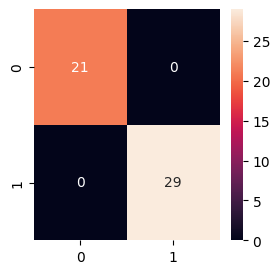

In [41]:
plt.figure(figsize=(3,3))
sns.heatmap(cf,annot=True)
plt.show()